# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and it is due on **September 30**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [48]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)

<Response [400]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [49]:
print(response.text)

{"error_id":502,"error_message":"too many requests from this IP, more requests available in 82577 seconds","error_name":"throttle_violation"}


It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [60]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

{
  "error_name": "throttle_violation",
  "error_message": "too many requests from this IP, more requests available in 82577 seconds",
  "error_id": 502
}


Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [61]:
import time
def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    list = []
    json_response = response.json()
    while (json_response['has_more']):
        for x in json_response['items']:
            for y in x.keys():
                if y == 'creation_date':
                    print(x[y])
                    time.sleep(0.05)
        x.clear()
                    

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [58]:
print(print_creation_dates_json(response))

KeyError: 'has_more'

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/open?id=0B4bdB5WPHGsqTm9PZlBhRVQzRmc) for Stack Overflow's posts in 2015. The link is only visible to BU students, so you must be logged in to your BU email. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv` using `to_csv()`. You may also parse out the data to `question_dataframe.csv` first and then create the `pandas DataFrame` using `read_csv()`. **(10 pts)**

Your code should run in a few minutes (not hours!). In a markdown cell, write down the approximate run time of your code.

In [1]:
import sys
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import iterparse
from datetime import datetime

header = ['Id', 'CreationDate','OwnerUserId','Tags']
data_1 = []
data_2 = []
data_3 = []
data_4 = []
index_list = []
dictionary_list = {}
index = 1
starttime = time.time()
print("The starting time is {}".format(starttime))
for event, element in ET.iterparse('stackoverflow-posts-2015.xml'):
    if (event == 'end'):
        if ('PostTypeId' in element.attrib):
            if (element.attrib['PostTypeId'] == "1"):
                if (element.attrib['Id']):
                    data_1.append(element.attrib['Id'])
                else:
                    data_1.append(element.attrib['Id'])
                if (element.attrib['CreationDate']):
                    data_2.append(element.attrib['CreationDate'])
                else:
                    data_2.append("")
                if ('OwnerUserId' in element.attrib):
                    data_3.append(element.attrib['OwnerUserId'])
                else:
                    data_3.append(element.attrib['OwnerDisplayName'])
                if (element.attrib['Tags']):
                    data_4.append(element.attrib['Tags'].split('>')[0].split('<')[1])
                else:
                    data_4.append("")
                    
    element.clear()
dictionary_list = dict([(header[0],data_1), (header[1],data_2), (header[2],data_3), (header[3], data_4)])
endtime = time.time()
print("The ending time is {}".format(endtime))
print("The total time runing time is {} seconds".format(endtime - starttime))



The starting time is 1475532367.5000515
The ending time is 1475532603.4555473
The total time runing time is 235.9554958343506 seconds


df = pd. DataFrame.from_dict(dictionary_list, orient='columns', dtype=None)
print(df)
df.to_csv('question_dataframe.csv', index = False)

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [44]:
# retrieve the data for the answers with PostTypeId = 2
import sys
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import xml.etree.cElementTree as ET
from xml.etree.ElementTree import iterparse
from datetime import datetime

header_2 = ['ParentId','OwnerUserId','Tags']
dict_user = {}
user_answer_question_id = {}
topquestion_id = []
top_tag = []
for event, element in ET.iterparse('stackoverflow-posts-2015.xml'):
    if (event == 'end'):
        if ('PostTypeId' in element.attrib):
            if (element.attrib['PostTypeId'] == "2"):
                if ('OwnerUserId' in element.attrib):
                    if element.attrib['OwnerUserId'] in dict_user:
                        dict_user[element.attrib['OwnerUserId']] += 1
                        user_answer_question_id[element.attrib['OwnerUserId']].append(element.attrib['ParentId'])
                    else:
                        dict_user[element.attrib['OwnerUserId']] = 1
                        user_answer_question_id[element.attrib['OwnerUserId']] = []
                        user_answer_question_id[element.attrib['OwnerUserId']].append(element.attrib['ParentId'])
                        
    element.clear()


KeyboardInterrupt: 

In [31]:
from collections import OrderedDict 
# get the top one hundred users with most common 100:
sorted_Dictionary = OrderedDict(sorted(dict_user.items(), key=lambda v: v[1], reverse=True))
count = 0
#get first 100 user
for userId in sorted_Dictionary:
    if count < 100:
        # if count less than 100 then append the strings
        topquestion_id.append(user_answer_question_id[userId])
        count += 1
    else:
        break
    

In [38]:
# define to get the top 100 user's answers' tags
tag_list = []
# get the tags from the csv file
next_df = pd.read_csv('question_dataframe.csv', index_col = 0)
Tag_Dictionary = Series(next_df.Tags.values, index = next_df.Id).to_dict()
for userquestion in topquestion_id:
    # create a tempt tags list
    tempt_tag_list = []
    for questionID in userquestion:
        tag = Tag_Dictionary.get((questionID))
        if tag not in tempt_tag_list:
            tempt_tag_list.append(tag)
    top_tag.append(tempt_tag_list)
                           
    

In [43]:
import numpy as np
# then start to find the similarity
# two forloops
array_1 = []
for user in top_tag:
    tempt_array = []
    for next_user in top_tag:
        dist = len(list(set(user)-set(next_user))) + len(list(set(next_user)-set(user)))
        tempt_array.append(dist)
    array_1.append(tempt_array)
matrix_1 = np.matrix(array_1)

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(10 pts)**

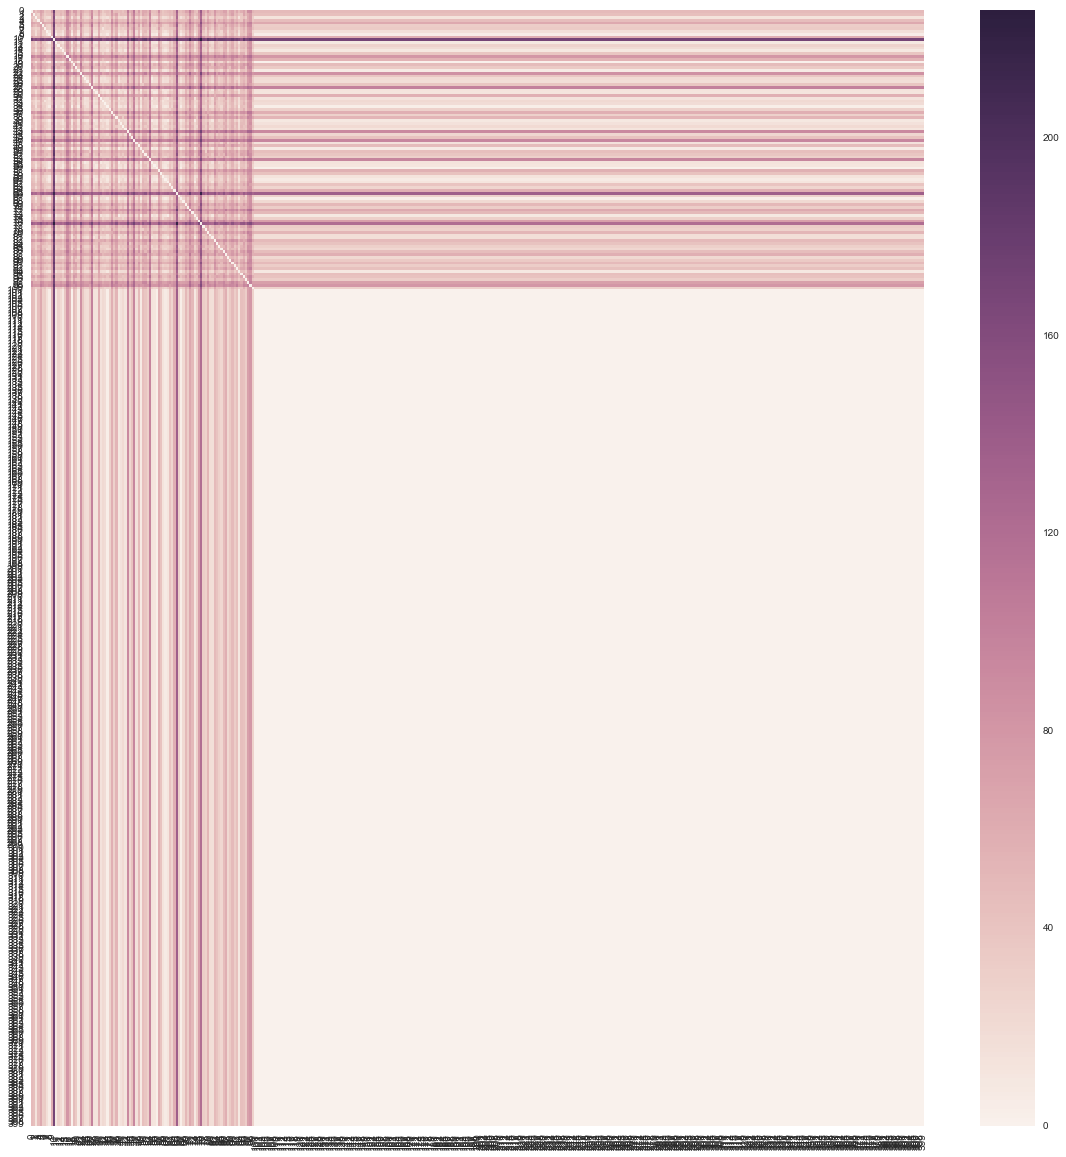

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
dimension = (20, 20)
figure1, ax = plt.subplots(figsize = dimension)
sns.heatmap(ax = ax, data = matrix_1)

-----------------